1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.


In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 2000
mu = [0, 0]
sigma = [1, 3]
X = np.zeros((3, N))
X[0] = np.random.normal(loc=mu[0], scale=sigma[0], size=N)
X[1] = X[0] + np.random.normal(loc=mu[1], scale=sigma[1], size=N)
X[2] = 2*X[0]+X[1]
# we build the covariance matrix
cov = np.cov(X)
# we find eigenvalues and eigenvectors
l, V = la.eig(cov)
l = np.real(l)
print(f"Eigenvalues are \n {l}")
print(f"Eigenvectors are \n {V}")

Eigenvalues are 
 [ 2.79778450e+01 -7.00564309e-16  2.01224795e+00]
Eigenvectors are 
 [[-0.11296904 -0.81649658  0.56619019]
 [-0.58046949 -0.40824829 -0.70454844]
 [-0.80640757  0.40824829  0.42783193]]


In [3]:
# SVD
U, spectrum, Vt = la.svd(X)
spectrum = np.array([spectrum[0], spectrum[2], spectrum[1]])
U = U[:, [0, 2, 1]]
print("shapes:", U.shape, spectrum.shape, Vt.shape)
print (spectrum**2/(N-1), '\n')
print (U, '\n')
# print (Vt, '\n')
np.allclose(spectrum**2/(N-1), l, rtol=1e-3), np.allclose(V, U, rtol=1e-3)

shapes: (3, 3) (3,) (2000, 2000)
[2.80888758e+01 9.38785760e-32 2.01236921e+00] 

[[-0.11304888 -0.81649658  0.56617425]
 [-0.58037013 -0.40824829 -0.70463029]
 [-0.80646789  0.40824829  0.42771822]] 



(False, True)

In [4]:
print(f"The trace of the covariance matrix is {np.trace(cov)}")
print(f"The sum of the eigenvalues is {np.sum(l)}")
tot = 0
for eigenvalue in l:
    tot += np.linalg.norm(eigenvalue/np.sum(l))
print(f"With this method we can explain {tot*100}% of the dataset, and this makes sense since we are dealing with datasets all with zero mean")

The trace of the covariance matrix is 29.990092936431022
The sum of the eigenvalues is 29.99009293643105
With this method we can explain 99.99999999999999% of the dataset, and this makes sense since we are dealing with datasets all with zero mean


In [5]:
print("In order to apply PCA and reduce our dataset to 99% of the total variability we perform a PCA:")
new = 0
lambda_trace = np.linalg.norm(np.sum(l))
for eig in l:
    print(np.linalg.norm(eig)/lambda_trace)
    if np.allclose(0, eig):
        true_l = np.real(np.delete(l, np.where(l == eig)))    
new = np.linalg.norm(sum(true_l))/lambda_trace
print(f"We have reached a variability of {new*100}% with dimensionality k = {true_l.size}")
print(f"We can reduce our dataset to the study of only the {true_l.size} features")

In order to apply PCA and reduce our dataset to 99% of the total variability we perform a PCA:
0.9329029103728883
2.3359857878728836e-17
0.0670970896271116
We have reached a variability of 100.0% with dimensionality k = 2
We can reduce our dataset to the study of only the 2 features


28.088875763553677 [-0.11304888 -0.58037013 -0.80646789]
9.387857599836033e-32 [-0.81649658 -0.40824829  0.40824829]
2.012369211335161 [ 0.56617425 -0.70463029  0.42771822]


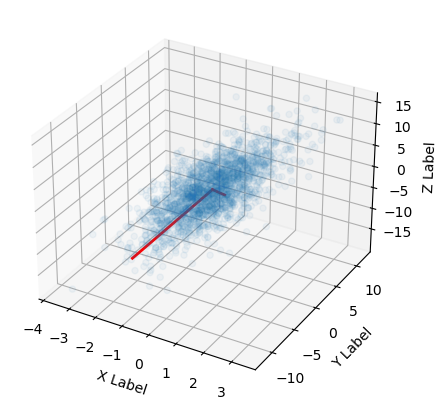

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
# the original data distribution
ax.scatter(X[0,:], X[1,:], X[2,:], alpha=0.05)
# a scale factor to emphazise the lines 
scale_factor=0.5
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
# draw each eigenvector
for li, vi in zip(spectrum**2/(N-1), U.T):
    print(li, vi)
    # the line is defined by means of its beginning and its end 
    ax.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
plt.show()

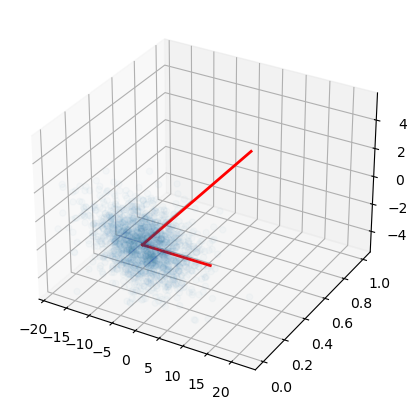

In [7]:
basis = U[:, [0, 2]]
basis, true_l
# rotate everything wrt the new basis vector
Xp = np.dot(V.T, X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xp[0,:], Xp[1,:], Xp[2, :], alpha=0.02)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(true_l, np.diag([1]*3)):
    ax.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
plt.show()

In [8]:
plt.rc('font', family='serif', size=8)
plt.rc('text', usetex=False)
plt.rc('mathtext', fontset='cm')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=20)

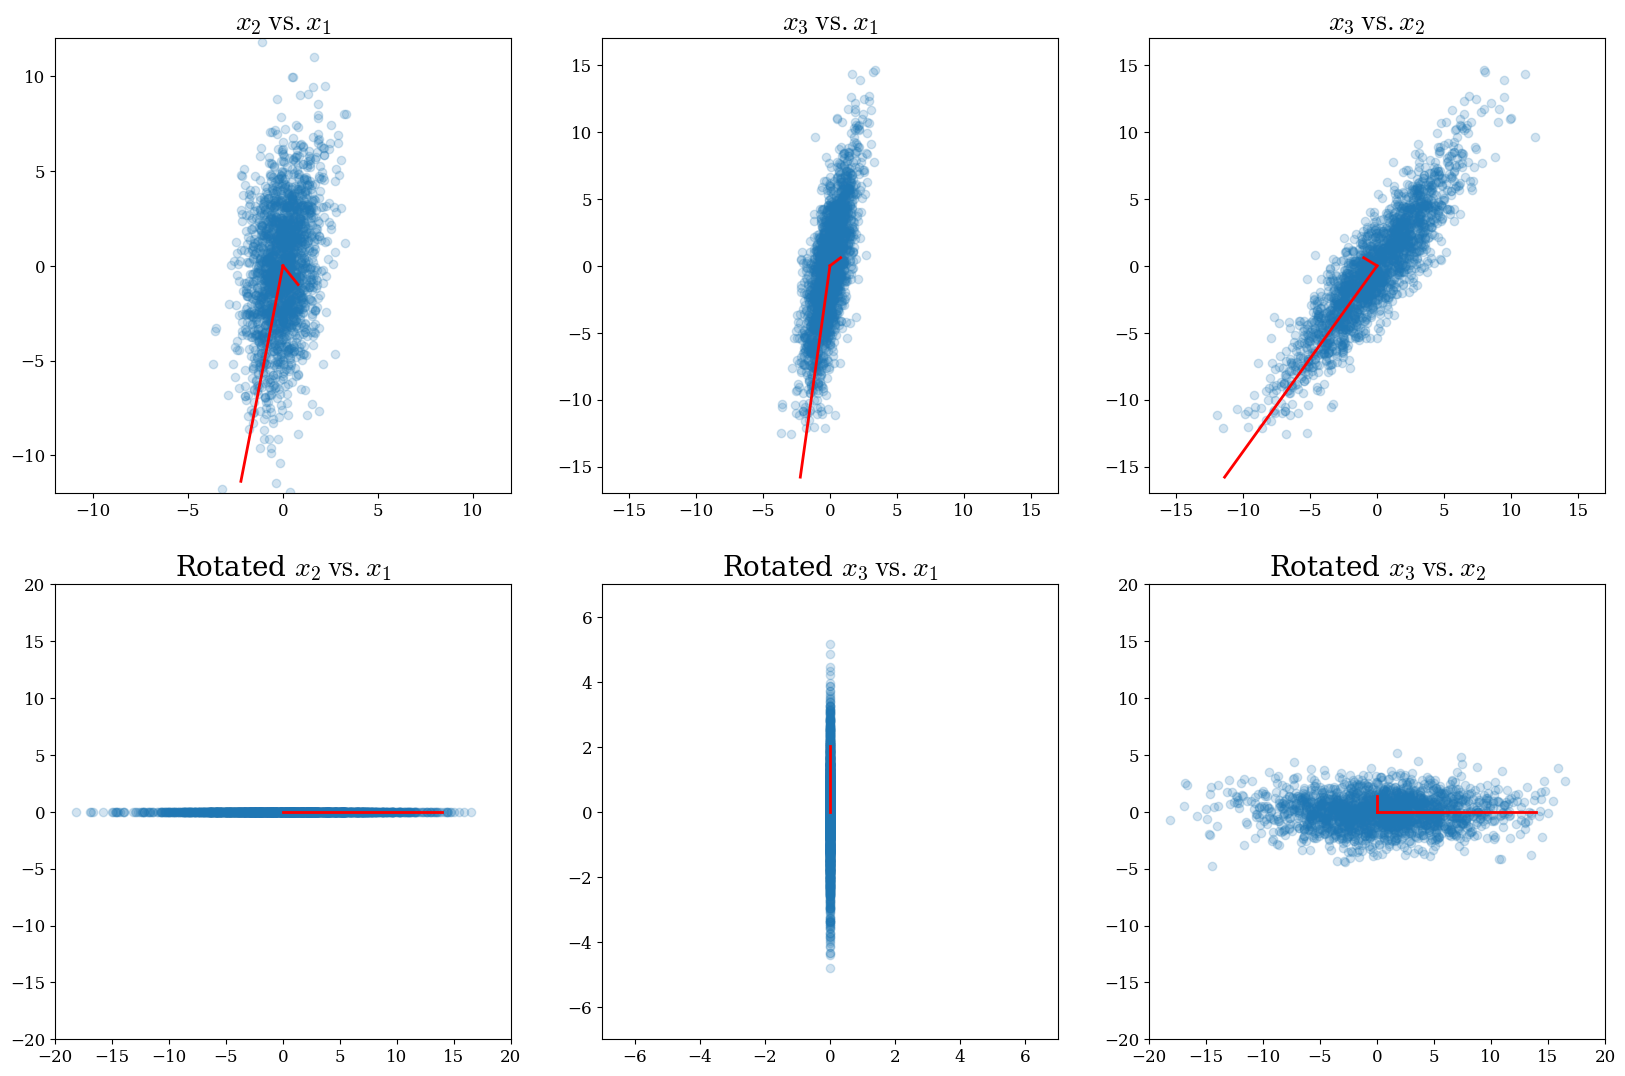

In [9]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20, 13))

scale_factor = 0.7

ax1.scatter(X[0,:], X[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax1.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
ax1.axis([-12,12,-12,12])
ax1.set_title(r'$x_2\:\mathrm{vs.}x_1$')

ax2.scatter(X[0,:], X[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax2.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax2.axis([-17,17,-17,17])
ax2.set_title(r'$x_3\:\mathrm{vs.}x_1$')

ax3.scatter(X[1,:], X[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax3.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax3.axis([-17,17,-17,17])
ax3.set_title(r'$x_3\:\mathrm{vs.}x_2$')

#rotated dataset

ax4.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax4.plot([0, 0.5*li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax4.axis([-20,20,-20,20])
ax4.set_title(r'Rotated $x_2\:\mathrm{vs.}x_1$')

ax5.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax5.plot([0, li*vi[1]], [0, li*vi[2]], 'r-', lw=2)
ax5.axis([-7,7,-7,7])
ax5.set_title(r'Rotated $x_3\:\mathrm{vs.}x_1$')

ax6.scatter(Xp[0,:], Xp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax6.plot([0, 0.5*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
ax6.axis([-20,20,-20,20])
ax6.set_title(r'Rotated $x_3\:\mathrm{vs.}x_2$')

plt.subplots_adjust(wspace = 0.2)
plt.show()


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [10]:
noise = np.random.normal(0, 2/25, size=(10, N))
new_X = np.concatenate((X, noise))
pd.DataFrame(new_X.T, columns=[f"x_{i}" for i in range(1, noise.shape[0]+X.shape[0]+1)])

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13
0,-1.700325,2.414448,-0.986203,-0.003131,0.086107,0.017254,0.021356,0.145066,0.129611,0.029440,-0.030529,0.097507,-0.031232
1,-1.547860,-7.160746,-10.256466,-0.151417,-0.121084,0.065946,0.011766,-0.056525,-0.154484,0.004182,0.020246,-0.095133,-0.062773
2,0.655713,-1.222876,0.088550,-0.010619,0.162221,-0.058233,-0.041560,-0.055124,0.013064,0.008877,-0.043925,0.035392,0.022152
3,0.451875,4.413809,5.317559,0.005291,0.119430,-0.090170,0.073941,-0.092258,0.079564,0.227787,0.009272,0.015201,0.047093
4,0.531663,0.982501,2.045828,0.065934,-0.038426,0.114904,-0.097804,-0.124149,0.021624,-0.111900,0.039104,0.092533,0.103966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.186183,0.203701,2.576068,0.036142,-0.107290,0.013736,-0.105394,-0.088609,-0.048973,0.003908,0.018217,0.042499,-0.067742
1996,-0.786603,-0.693603,-2.266809,0.099640,0.113360,-0.015959,-0.097186,0.132100,-0.040021,-0.051490,-0.013951,0.040643,0.121559
1997,0.932410,4.243438,6.108258,-0.021437,-0.127640,0.057627,0.000899,-0.008537,0.004173,0.014957,0.173939,0.155487,0.073913
1998,-0.062107,1.822115,1.697902,-0.040475,-0.042888,0.038235,0.002464,0.094456,-0.023090,0.001139,-0.020685,0.131628,-0.063794


In [11]:
# Now we perform a PCA
new_cov = np.cov(new_X)
l, V = la.eig(new_cov)
l = np.real(l)
print(f"Eigenvalues are \n {l}")
# print(f"Eigenvectors are \n {V}")

lambda_trace = np.sum(l)
new = 0
k = 0
for eig in l:
    print(eig/lambda_trace)
    if new >= 0.99:
        break
    if np.allclose(0, eig):
        true_l = np.real(np.delete(l, np.where(l == eig)))    
    else:
        new += eig/lambda_trace
        k += 1
print(f"We have reached a variability of {new*100}% with dimensionality k = {k}")

Eigenvalues are 
 [ 2.79778706e+01  2.01229351e+00 -5.89039547e-16  7.37221889e-03
  7.16596145e-03  5.60051309e-03  6.83381081e-03  6.72259957e-03
  5.98594566e-03  6.04250006e-03  6.22549636e-03  6.35685369e-03
  6.44477911e-03]
0.9308916959367173
0.06695389174263537
-1.9598776171193907e-17
We have reached a variability of 99.78455876793527% with dimensionality k = 2


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [12]:
n = 5 # number of cameras
N = 2000
def sample_spherical(npoints, ndim=3, loc=0, std=1):
    vec = np.random.randn(ndim, npoints)*std + loc
    vec /= np.linalg.norm(vec, axis=0)
    return vec
X = np.zeros((n, N))
print(X.shape)
for i in range(n): 
    r, theta, phi = sample_spherical(N) 
    X[i] = r*np.cos(theta)*np.sin(phi)

# We now suppose some noise along the y axis:
r, theta, phi = sample_spherical(N, loc=0, std=1/100) 
noise = y = r*np.sin(theta)*np.sin(phi)
X = np.sqrt(X**2+noise**2)

(5, 2000)


In [13]:
# PCA
l, V = la.eig(np.cov(X))
l = np.real(l)
print(f"Eigenvalues are \n {l}")
print(f"Eigenvectors are \n {V}")
print("In order to apply PCA and reduce our dataset to 90% of the total variability we perform a PCA:")
lambda_trace = np.sum(l)
new = 0
k = 0
for eig in l:
    print(eig/lambda_trace)
    if new >= 0.90:
        break
    else:
        new += eig/lambda_trace
        k += 1
print(f"We have reached a variability of {new*100}% with dimensionality k = {k}")
print(f"We can reduce our dataset to the study of only the {k} feature")

Eigenvalues are 
 [0.01749599 0.0133844  0.01423227 0.01463927 0.01515817]
Eigenvectors are 
 [[ 0.50649993  0.49324612 -0.40670631 -0.56183957  0.13817511]
 [ 0.42219878 -0.71091402  0.32050293 -0.45322905  0.09061318]
 [ 0.46827918  0.21460415  0.33232919  0.18084414 -0.76909842]
 [ 0.40732136 -0.3800547  -0.65905664  0.5046868  -0.02415207]
 [ 0.42427579  0.24660291  0.43251533  0.4376144   0.61692884]]
In order to apply PCA and reduce our dataset to 90% of the total variability we perform a PCA:
0.23355980975220664
0.17867280531388496
0.18999139316329022
0.19542449838116333
0.20235149338945477
We have reached a variability of 100.0% with dimensionality k = 5
We can reduce our dataset to the study of only the 5 feature


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [14]:
# # get the dataset and its description on the proper data directory
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [15]:
data = pd.read_csv('//wsl.localhost/Ubuntu/home/tancredir/data/magic04.data', nrows=1000)
data.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','category']
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g
...,...,...,...,...,...,...,...,...,...,...,...
995,13.3396,10.5628,2.1917,0.7910,0.4019,-14.8910,-2.3901,11.9001,10.7959,182.910,g
996,49.8521,11.4525,2.3971,0.4529,0.2305,52.6071,39.3622,-8.6905,6.0457,183.495,g
997,29.2688,14.2779,2.5723,0.4016,0.2021,-21.2132,-23.9344,-8.2073,47.5590,102.779,g
998,21.9470,20.3281,2.4864,0.4078,0.2072,12.8338,10.4007,14.8348,40.4341,137.810,g


In [16]:
del data['category']
cov_magic = np.cov(data.T)
l_magic, V_magic = la.eig(cov_magic)
l_magic = np.sort(l_magic)[::-1]
l_magic = np.real_if_close(l_magic)

In [17]:
l_magic

array([5.38228278e+03, 1.65853770e+03, 9.48033215e+02, 3.83059297e+02,
       2.59759249e+02, 1.84642352e+02, 3.65376511e+01, 4.50759550e-02,
       8.87701449e-03, 3.54537447e-04])

In [18]:
lambda_trace = np.sum(l_magic)
new = 0
k = 0
for eig in l_magic:
    print(eig/lambda_trace)
    if new >= 0.99:
        break
    else:
        new += eig/lambda_trace
        k += 1
print(f"We have reached a variability of {new*100}% with dimensionality k = {k}")

0.607967874204298
0.18734386200726377
0.10708722718015515
0.04326932568168922
0.02934169102408709
0.02085669280152066
0.004127192674220823
We have reached a variability of 99.5866672899014% with dimensionality k = 6
